# Station characterisation

In this notebook, bicycle counting stations are characterised based on their temporal traffic patterns. The aim is to distinguish stations dominated by work-related (utilitarian) traffic from those primarily used for leisure, while explicitly allowing for intermediate cases.

We define three usage types:

- Leisure: relatively high weekend traffic, weak weekend drop, strong seasonal variation

- Utilitarian: pronounced weekday double peaks, strong weekend drop, weak seasonal variation

- Mixed: a combination of leisure and utilitarian characteristics

Important: These patterns are not strict rules but guiding assumptions. For example, a leisure station may still exhibit weekday double peaks due to commuter traffic. Such behaviour is not contradictory if other dominant properties justify its classification as leisure.

In [14]:
from data_io.loader.data_loader import DataLoader
dl = DataLoader()

## Indices
To compare station behaviour across different temporal scales, we use normalized indices on hourly, daily, and monthly levels. Normalisation ensures that stations with different absolute traffic volumes remain comparable.
To showcase the output of each Indice we will use a arbitrary station of Heidelberg.

In [15]:
station = "Plöck"

**Daily Mean Count**

The daily mean count $\bar{C}_{24h}$ is defined as the total daily traffic divided by the number of observed days.

In [16]:
from analysis.visualization.characterisation.indices import daily_mean_count

daily_mean_count(loader=dl, station_name=station)

4167.55800775425

**Hourly index**

The hourly index measures the relative traffic intensity of each hour compared to the daily mean:

$$
\begin{align*}
I_{h} = \frac{\bar{C}_{1h}}{\bar{C}_{24h}}
\end{align*}
$$

This highlights typical diurnal patterns, such as low night-time counts and increased traffic during morning and evening hours.

In [17]:
from analysis.visualization.characterisation.indices import hourly_index

hourly_index(loader=dl, station_name=station, channel="channels_all")

hour,mean_C_1h,I_h
i8,f64,f64
0,19.627098,0.004709
1,12.916767,0.003099
2,8.23674,0.001976
3,7.469565,0.001792
4,17.485603,0.004196
…,…,…
19,159.473495,0.038265
20,130.726101,0.031368
21,99.647526,0.02391


**Daily Index**

The daily index captures day-to-day variability, normalised by the overall daily mean:

$$
\begin{align*}
I_{d} = \frac{\bar{C}_{1d}}{\bar{C}_{24h}}
\end{align*}
$$

In [18]:
from analysis.visualization.characterisation.indices import daily_index

daily_index(loader=dl, station_name=station, channel="channels_all")

weekday,mean_C_1d,I_d
i8,f64,f64
1,4488.417537,1.07699
2,4886.343096,1.172472
3,4865.460417,1.167461
4,4825.135699,1.157785
5,4372.377358,1.049146
6,3544.770355,0.850563
7,2199.517672,0.527771


**Monthly Index**

The monthly index reflects seasonal variation by comparing average monthly traffic to the daily mean:
$$
\begin{align*}
I_{m} = \frac{\bar{C}_{30d}}{\bar{C}_{24h}}
\end{align*}
$$

In [19]:
from analysis.visualization.characterisation.indices import monthly_index

monthly_index(loader=dl, station_name=station, channel="channels_all")

month,mean_C_1d,I_m
i8,f64,f64
1,3396.226667,0.81492
2,3557.789272,0.853687
3,3318.639576,0.796303
4,4076.510274,0.978153
5,4739.494624,1.137235
…,…,…
8,3672.856631,0.881297
9,3844.618519,0.922511
10,4522.753571,1.085229


## Exploratory Plots

Before clustering, we visually explore the temporal patterns of all stations using normalized indices.

**Hourly Indices**

The aggregated hourly indices illustrate a clear contrast between weekdays and weekends on average: weekdays exhibit a pronounced double-peak structure, while weekend profiles are flatter and more evenly distributed. However, the semi-transparent individual curves already indicate substantial variability across stations.

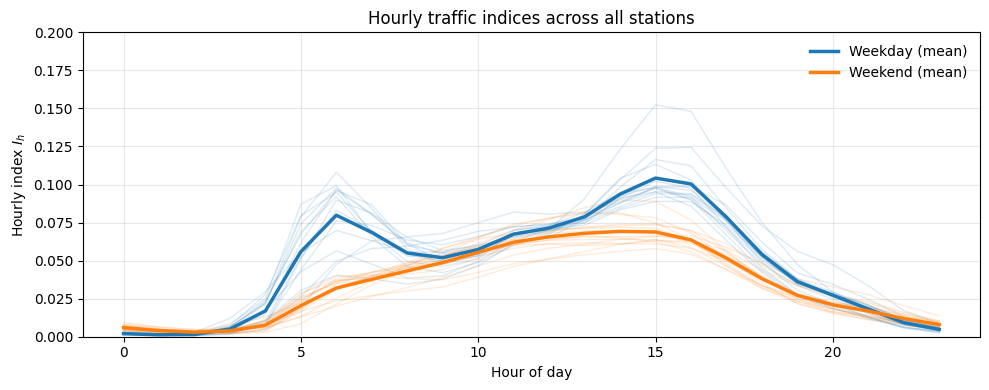

In [20]:
from analysis.visualization.characterisation.plotting import plot_hourly_indices_all

plot_hourly_indices_all(dl)


We next inspect hourly profiles on a per-station basis. These plots reveal that several stations deviate from the canonical utilitarian or leisure patterns. Examples include stations with a single dominant peak, shifted peak times, or only minor differences between weekday and weekend profiles.

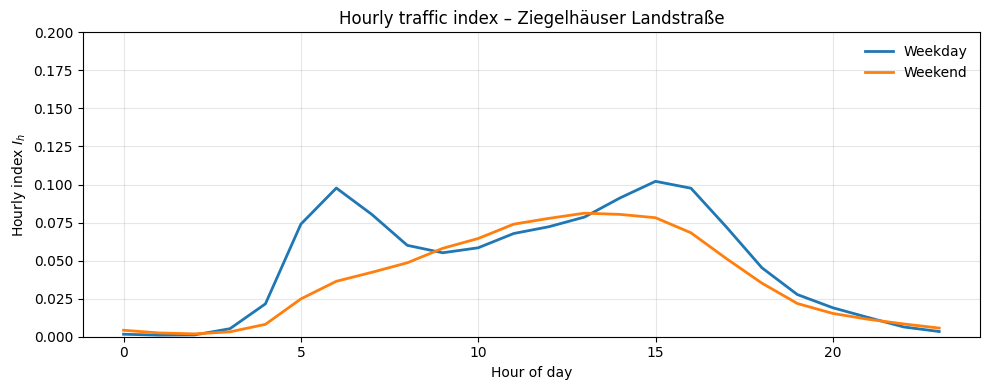

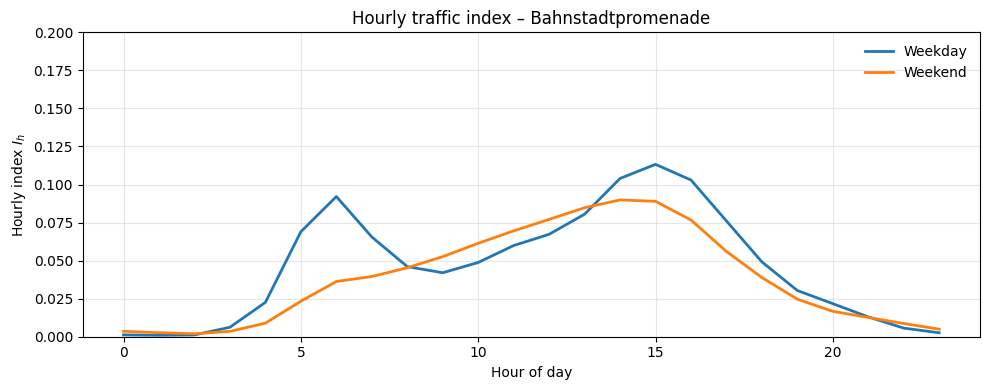

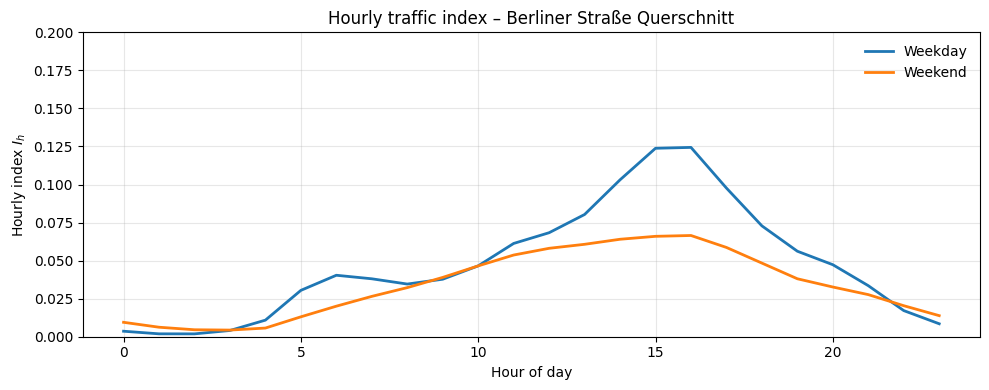

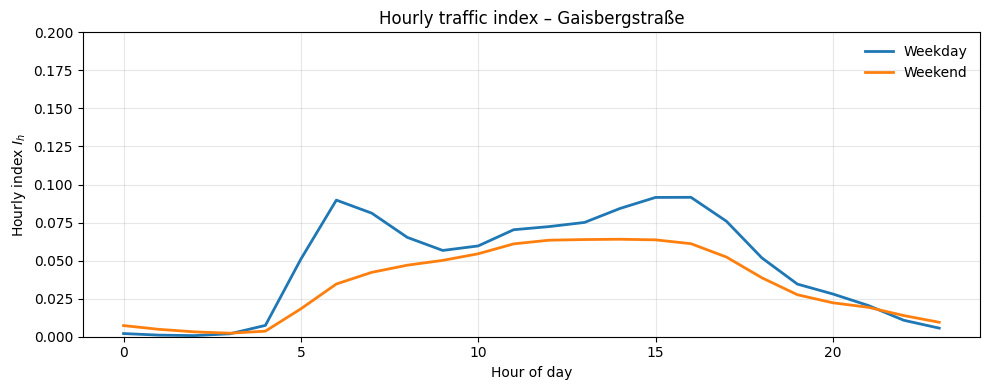

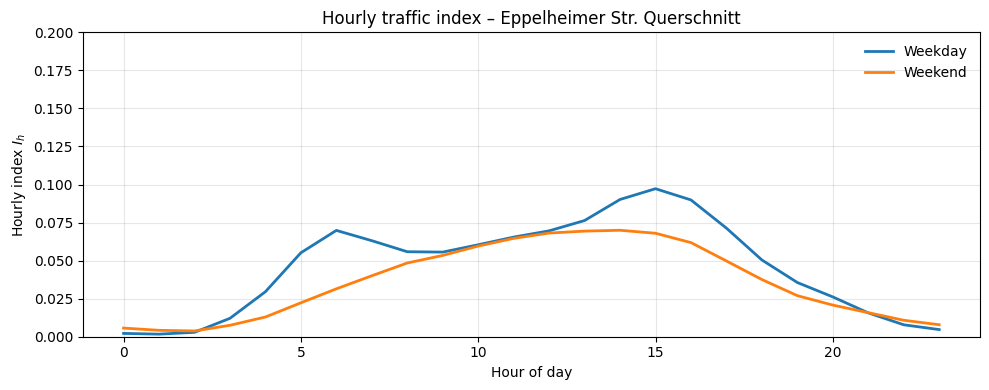

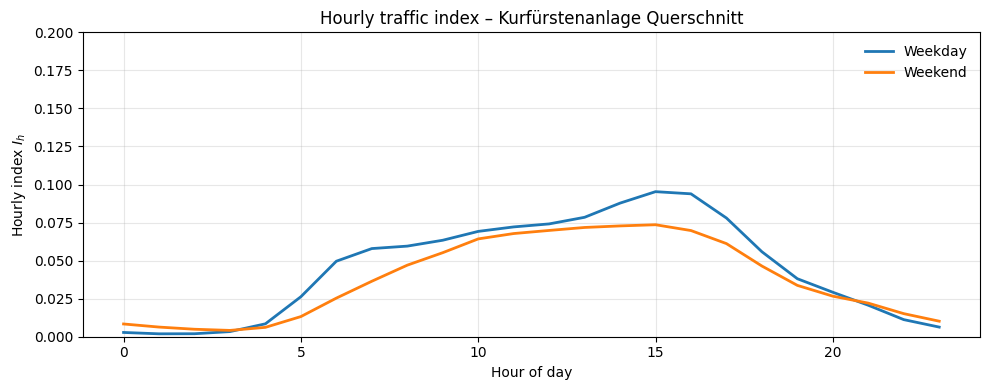

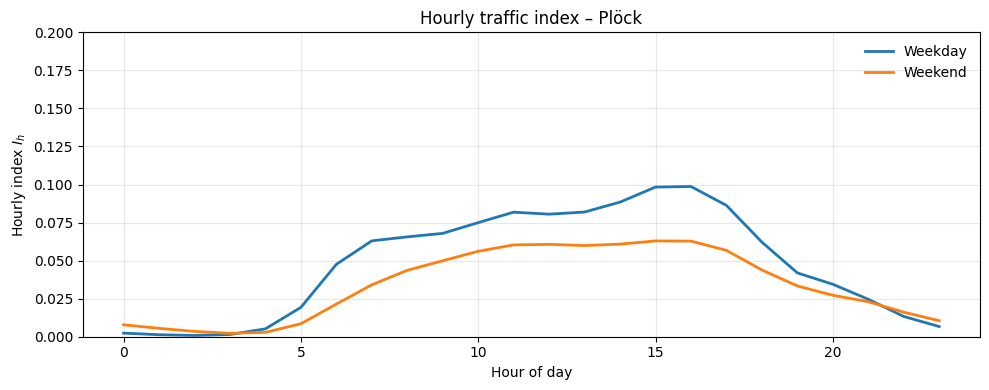

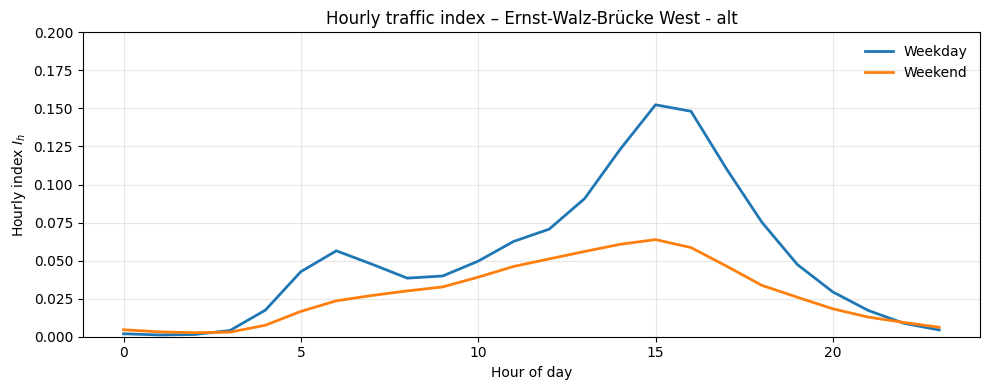

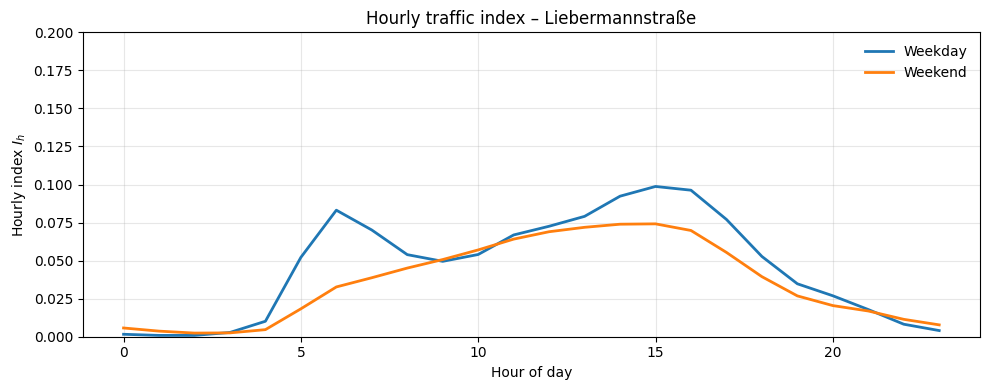

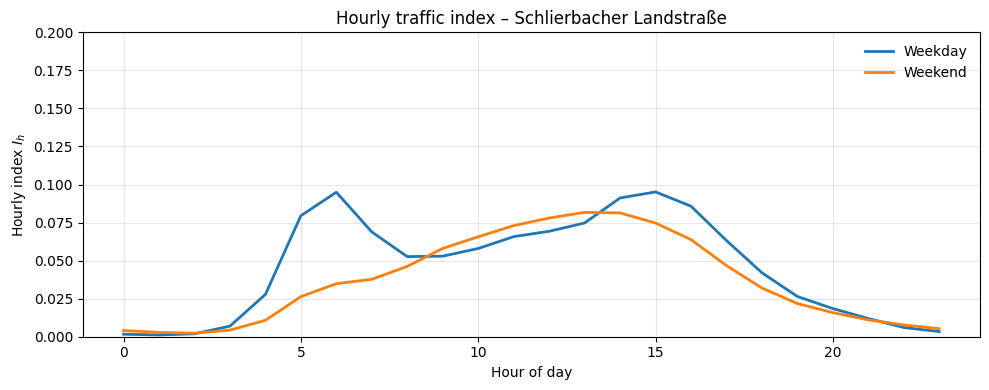

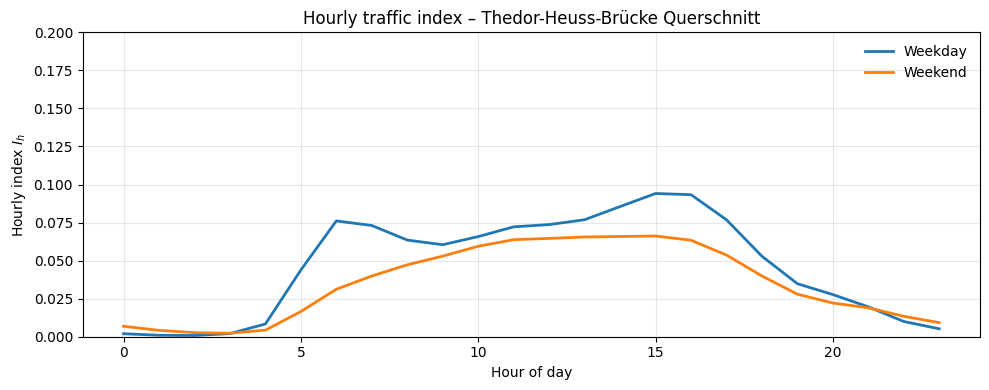

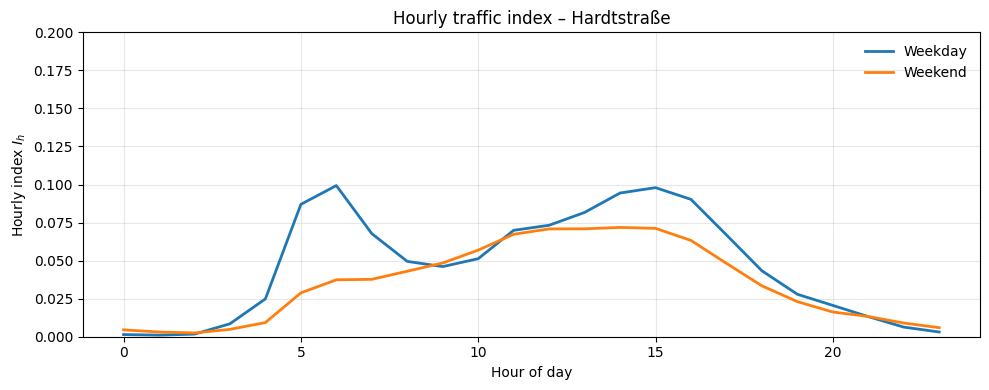

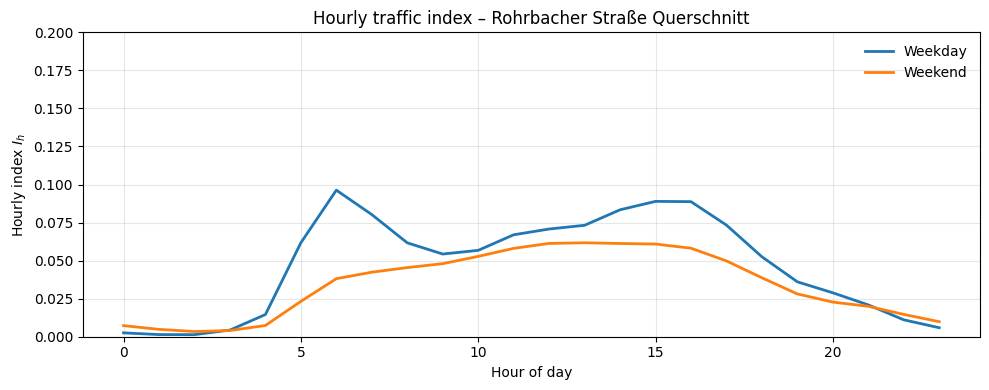

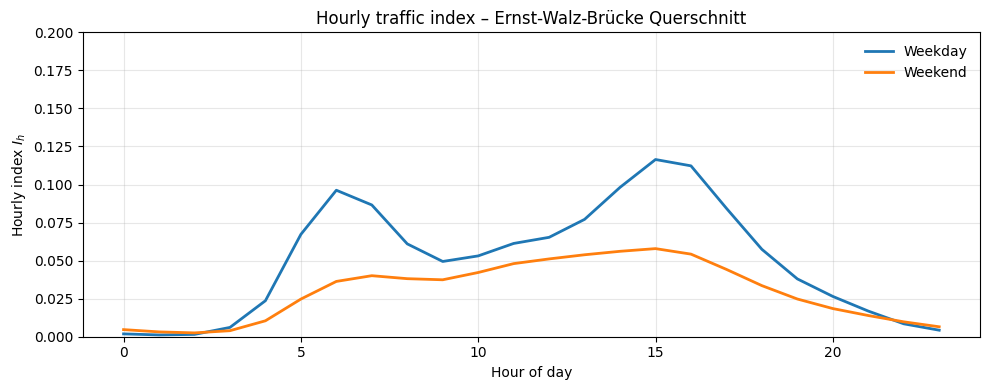

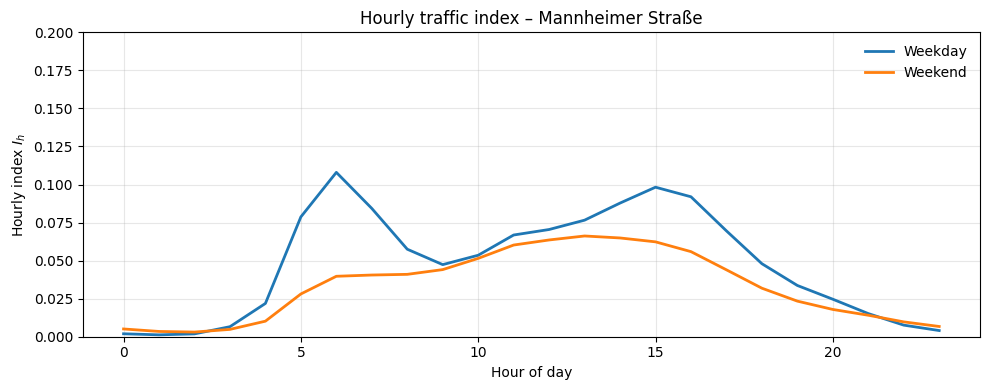

In [21]:
from analysis.visualization.characterisation.plotting import plot_hourly_indices

for station in dl.get_bicyle_stations():
  plot_hourly_indices(loader=dl, station_name=station, channel="channels_all", interval=None, ylim=(0, 0.2), show_metrics=False)

**Monthly Indices**

Monthly indices reveal substantial differences in seasonality across stations. Some stations show pronounced increases in traffic during warmer months and strong drops in winter, indicating seasonally driven or leisure-oriented usage. In contrast, other stations exhibit relatively stable traffic levels throughout the year, consistent with predominantly utilitarian travel patterns.

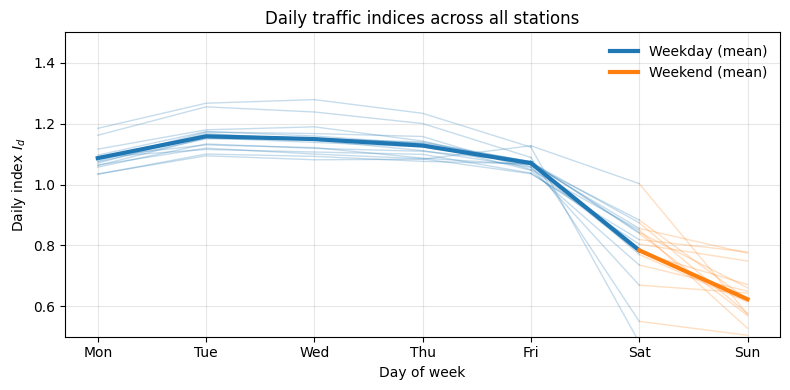

In [22]:
from analysis.visualization.characterisation.plotting import plot_daily_indices_all

plot_daily_indices_all(dl)

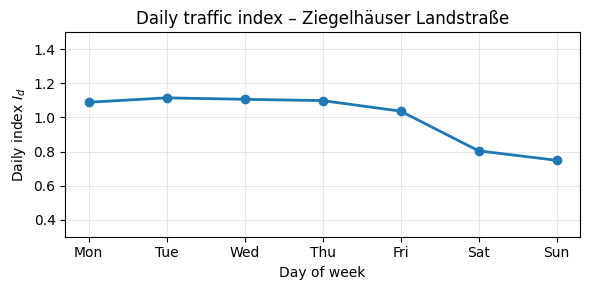

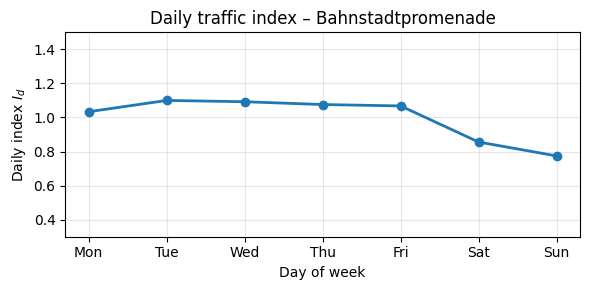

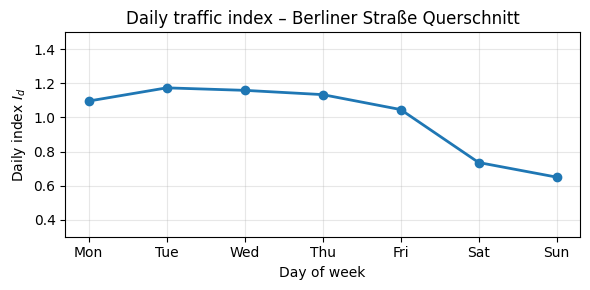

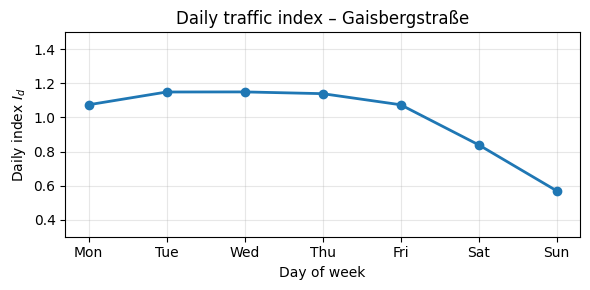

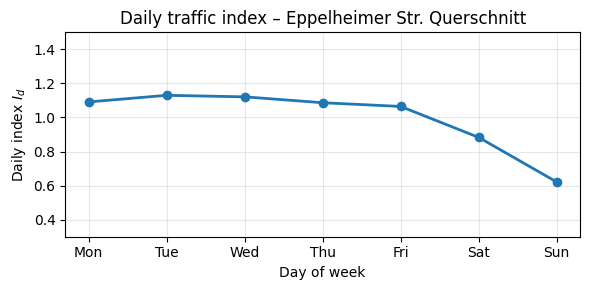

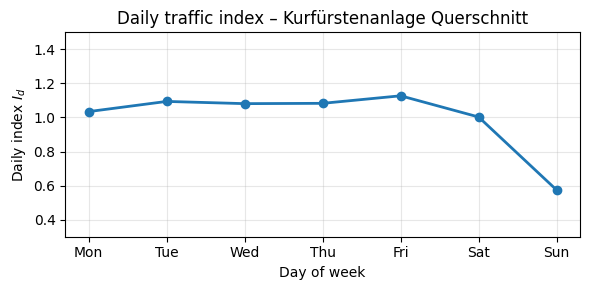

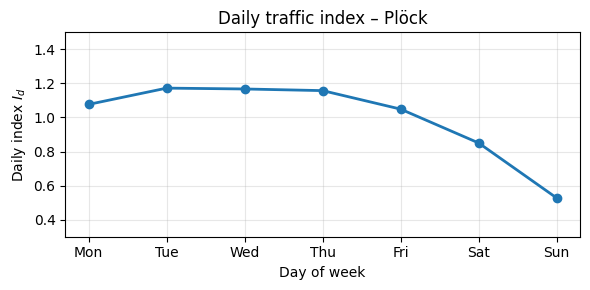

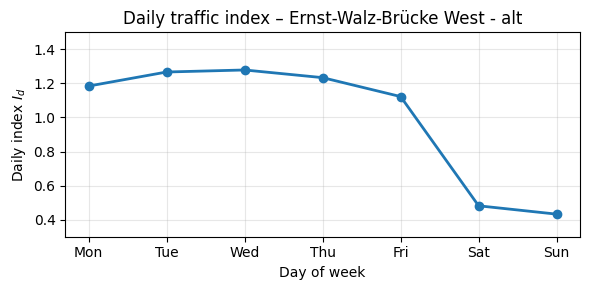

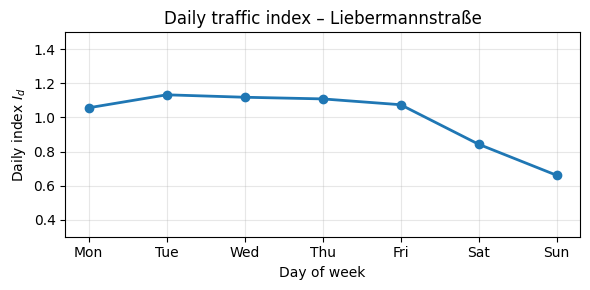

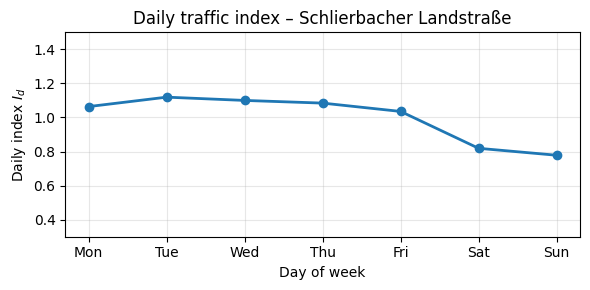

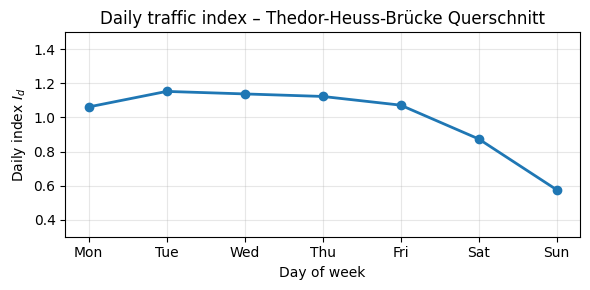

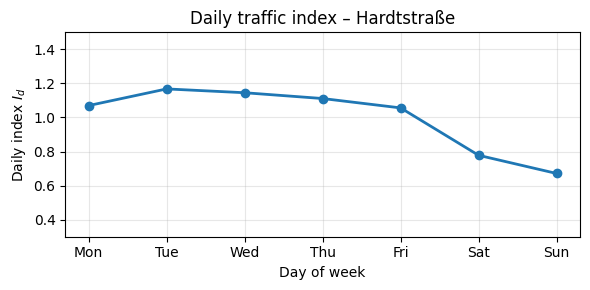

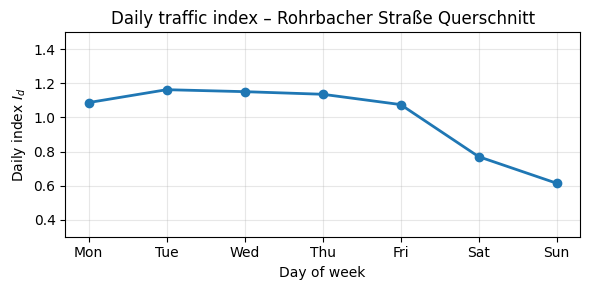

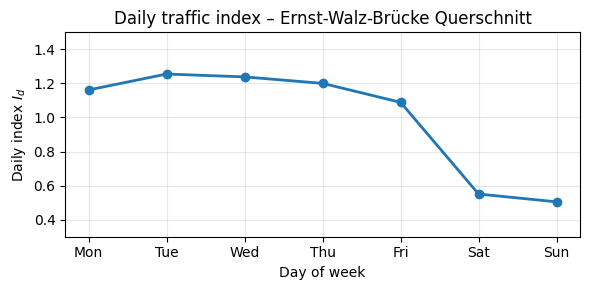

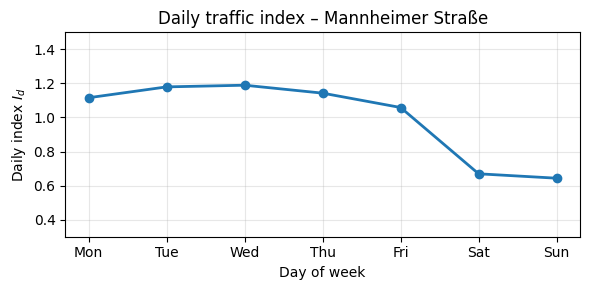

In [23]:
from analysis.visualization.characterisation.plotting import plot_daily_indices

for s in dl.get_bicyle_stations():
    plot_daily_indices(dl, s, ylim=(0.3,1.5), show_metric=False)

Warm/Cold Drop: 0.5319309321780678


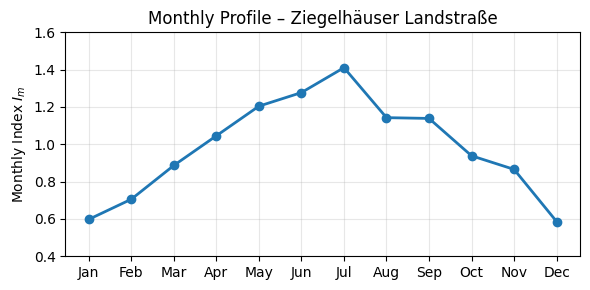

Warm/Cold Drop: 0.4879021592362688


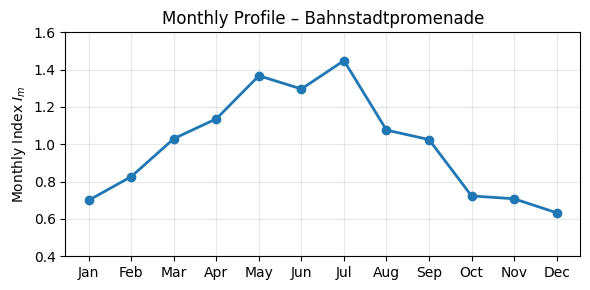

Warm/Cold Drop: 0.3840154469390072


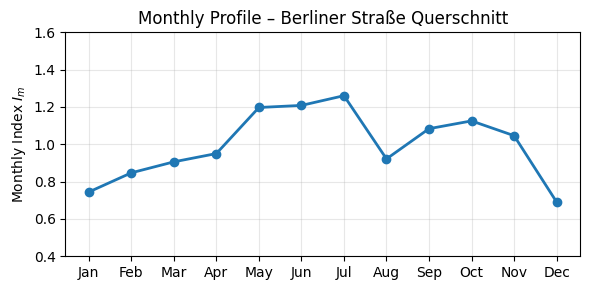

Warm/Cold Drop: 0.3910761192705586


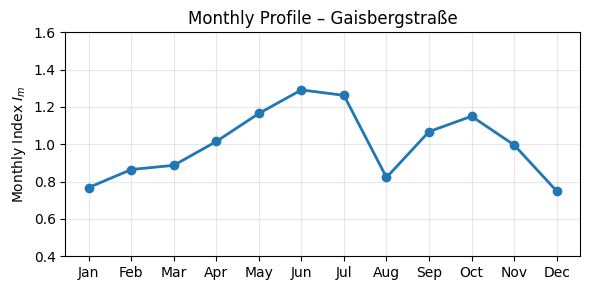

Warm/Cold Drop: 0.4819012514573318


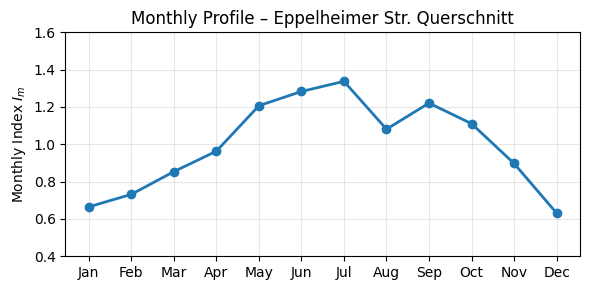

Warm/Cold Drop: 0.4983401424427662


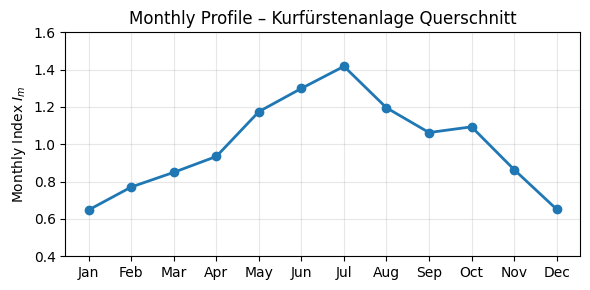

Warm/Cold Drop: 0.33315647436890367


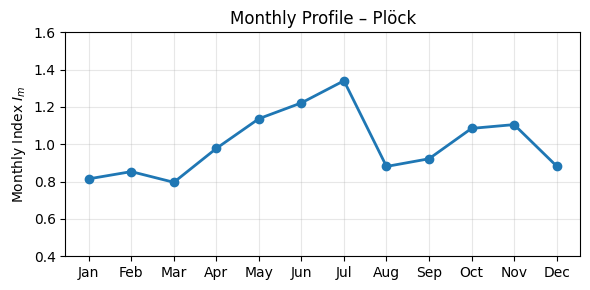

Warm/Cold Drop: 0.4206005371380017


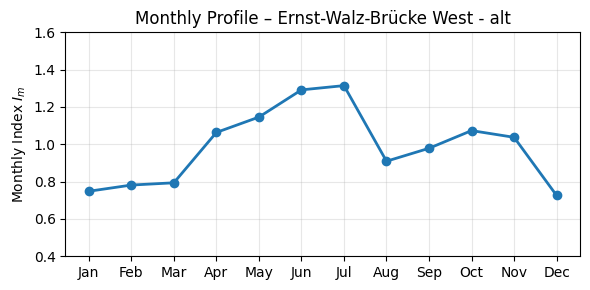

Warm/Cold Drop: 0.41347101731089114


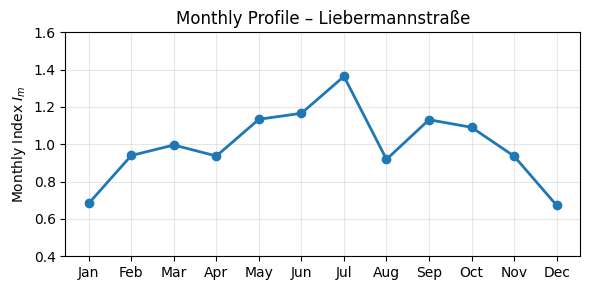

Warm/Cold Drop: 0.6479937219588756


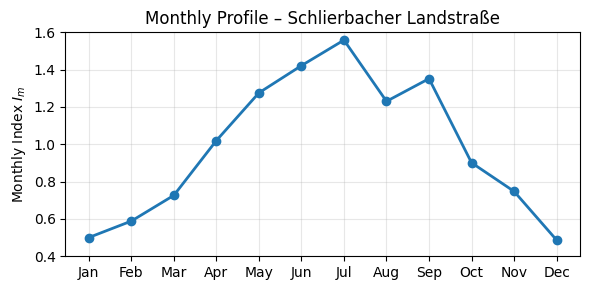

Warm/Cold Drop: 0.35323360586618796


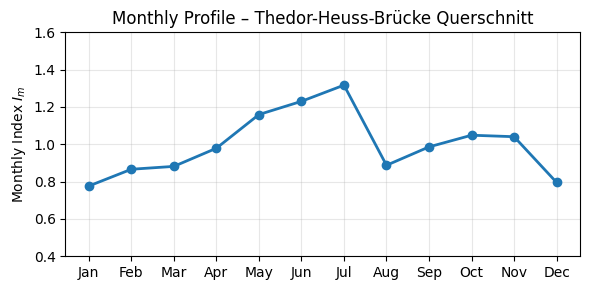

Warm/Cold Drop: 0.4759796219587679


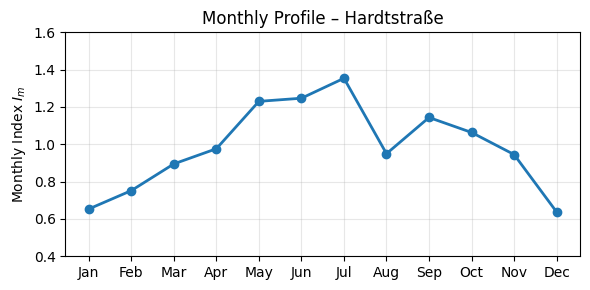

Warm/Cold Drop: 0.32040890712281617


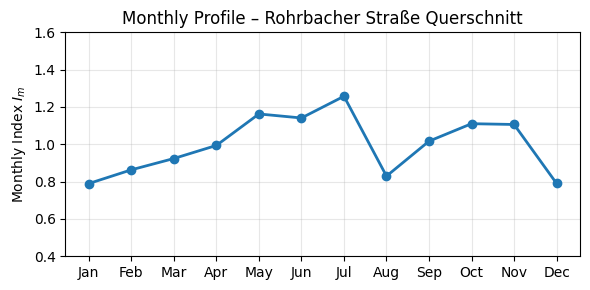

Warm/Cold Drop: 0.3455807469564669


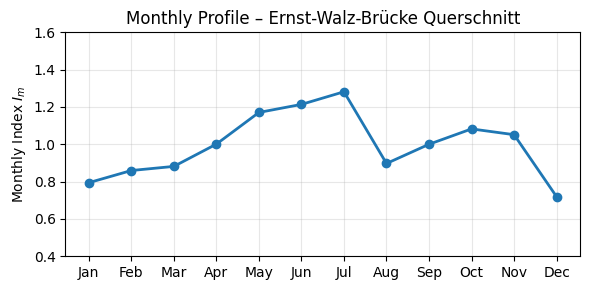

Warm/Cold Drop: 0.5046743222303309


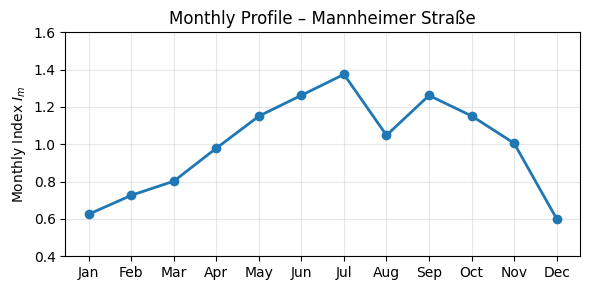

In [24]:
from analysis.visualization.characterisation.plotting import plot_monthly_indices

for s in dl.get_bicyle_stations():
    plot_monthly_indices(dl, s, ylim=(0.4, 1.6))

### Clustering using K-Means
Since we want to classify the stations, we will build a feature vector which holds discriminators between leisure and 
utilitarian counting stations.

As discriminators we can choose the following:

In [25]:
from analysis.visualization.characterisation.features import build_feature_df

X = build_feature_df(dl)
X

station,DPI,Drop_season,Shape_diff_wd_we,valid
str,f64,f64,f64,bool
"""Ziegelhäuser Landstraße""",0.029705,0.531931,0.080283,true
"""Bahnstadtpromenade""",0.03312,0.487902,0.078028,true
"""Berliner Straße Querschnitt""",0.008953,0.384015,0.057203,true
"""Gaisbergstraße""",0.023627,0.391076,0.058062,true
"""Eppelheimer Str. Querschnitt""",0.012723,0.481901,0.05376,true
…,…,…,…,…
"""Thedor-Heuss-Brücke Querschnit…",0.011896,0.353234,0.050166,true
"""Hardtstraße""",0.03257,0.47598,0.076782,true
"""Rohrbacher Straße Querschnitt""",0.023816,0.320409,0.059759,true


Find out which K we should choose to maximize Silhouette score (https://de.wikipedia.org/wiki/Silhouettenkoeffizient).

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import polars as pl

X_valid = X.filter(pl.col("valid") == True)
X_feat = X_valid.drop(["station", "valid"]).to_numpy()
X_scaled = StandardScaler().fit_transform(X_feat)

best_k = 0
best_score = 0
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=20)
  labels = kmeans.fit_predict(X_scaled)

  score = silhouette_score(X_scaled, labels)
  
  if score > best_score:
    best_k = k
    best_score = max(best_score, score)

  print(f"k={k}: {score:.3f}")

print(f"Best seperation with K = {best_k}")

k=2: 0.479
k=3: 0.399
k=4: 0.378
k=5: 0.369
k=6: 0.346
k=7: 0.343
k=8: 0.353
k=9: 0.325
Best seperation with K = 2


In [27]:
#kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=20)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
labels = kmeans.fit_predict(X_scaled)

X_valid = X_valid.with_columns(pl.Series("cluster_k", labels))

X_k = X.join(
    X_valid.select(["station", "cluster_k"]),
    on="station",
    how="left"
)

X_k.drop(["station", "valid"]).group_by("cluster_k").mean()

cluster_k,DPI,Drop_season,Shape_diff_wd_we
i32,f64,f64,f64
2,0.008258,0.410129,0.045385
0,0.023539,0.378227,0.060541
1,0.031703,0.529696,0.078654


Before we continue let's check the performance of our features to discriminate the data in clusters. 

In [28]:
FEATURES = ["DPI", "Drop_season", "Shape_diff_wd_we"]

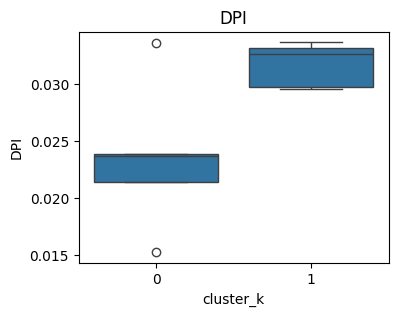

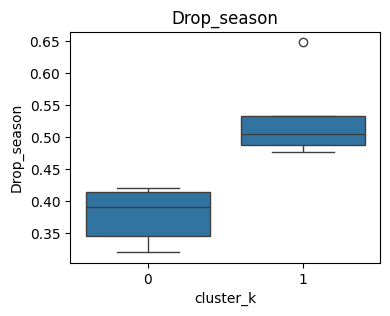

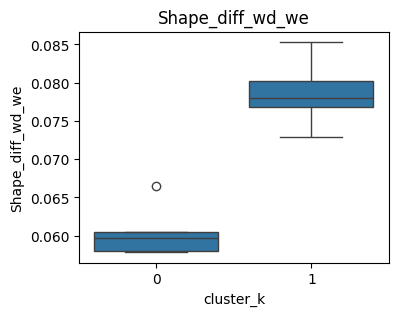

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

df = X_k.filter(pl.col("cluster_k").is_in([0, 1]))

for feat in FEATURES:
    plt.figure(figsize=(4,3))
    sns.boxplot(data=df, x="cluster_k", y=feat)
    plt.title(feat)
    plt.show()

In [30]:
X_valid.select(FEATURES).corr()

DPI,Drop_season,Shape_diff_wd_we
f64,f64,f64
1.0,0.347306,0.829028
0.347306,1.0,0.603914
0.829028,0.603914,1.0


### PCA
Reducing ```X_scaled``` with to two dimensions.

In [31]:
from sklearn.decomposition import PCA


pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)

X_pca_pl = (
    X_k
    .with_columns([
        pl.Series("PC1", X_pca[:, 0]),
        pl.Series("PC2", X_pca[:, 1]),
    ])
)
X_pca_pl

Explained variance: [0.73615603 0.22461325]


station,DPI,Drop_season,Shape_diff_wd_we,valid,cluster_k,PC1,PC2
str,f64,f64,f64,bool,i32,f64,f64
"""Ziegelhäuser Landstraße""",0.029705,0.531931,0.080283,true,1,1.792586,0.274747
"""Bahnstadtpromenade""",0.03312,0.487902,0.078028,true,1,1.636749,-0.301454
"""Berliner Straße Querschnitt""",0.008953,0.384015,0.057203,true,2,-1.171166,0.147026
"""Gaisbergstraße""",0.023627,0.391076,0.058062,true,0,-0.284028,-0.556558
"""Eppelheimer Str. Querschnitt""",0.012723,0.481901,0.05376,true,2,-0.556825,0.908992
"""Kurfürstenanlage Querschnitt""",0.00394,0.49834,0.034514,true,2,-1.768329,1.685541
"""Plöck""",0.003778,0.333156,0.03128,true,2,-2.8474,0.154168
"""Ernst-Walz-Brücke West - alt""",0.01525,0.420601,0.066512,true,0,-0.220531,0.087408
"""Liebermannstraße""",0.021422,0.413471,0.060512,true,0,-0.175171,-0.250213


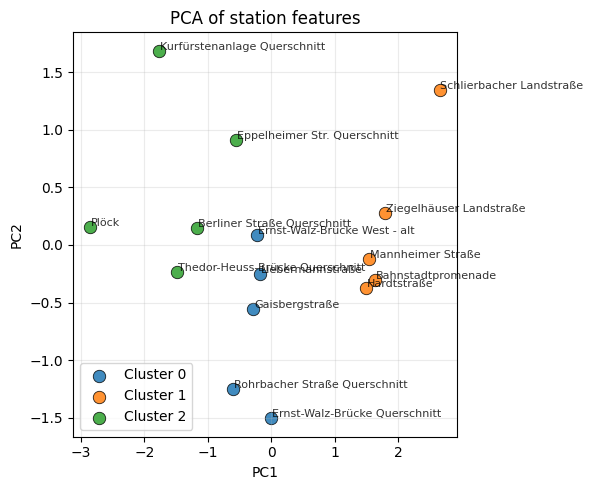

In [32]:
from analysis.visualization.characterisation.plotting import plot_pca_clusters

plot_pca_clusters(
    X_pca_pl,
    cluster_col="cluster_k",
    annotate=True
)

### Robustness of classes
Currently we calculate the classes for the entire counting station data set. This data set has a date range

In [33]:
mins, maxs = [], []

for station in dl.get_bicyle_stations():
  bd = dl.get_bicycle(station_name=station)
  min_date, max_date = bd.date_range()
  mins.append(min_date)
  maxs.append(max_date)

print(f"Date range of all counting station: {min(mins)} - {max(maxs)}")

Date range of all counting station: 2014-05-31 22:00:00+00:00 - 2025-10-31 21:00:00+00:00


Lets check how robust our clustering is if we restrict the time window. We will define different time windows and check how many stations switched cluster type.

In [34]:
interval_16_17 = ("2016-01-01", "2017-01-01")
interval_15_18 = ("2015-01-01", "2018-01-01")
interval_18_21 = ("2018-01-01", "2021-01-01")
interval_21_24 = ("2021-01-01", "2024-01-01")

feature_15_18 = build_feature_df(loader=dl, interval=interval_15_18)
feature_16_17 = build_feature_df(loader=dl, interval=interval_16_17)
feature_18_21 = build_feature_df(loader=dl, interval=interval_18_21)
feature_21_24 = build_feature_df(loader=dl, interval=interval_21_24)

In [35]:
def cluster_interval(loader, interval=None, k=3):
    X = build_feature_df(loader, interval)
    X_valid = X.filter(pl.col("valid") == True)

    X_feat = X_valid.drop(["station", "valid"]).to_numpy()
    X_scaled = StandardScaler().fit_transform(X_feat)

    labels = KMeans(
        n_clusters=k, random_state=0, n_init=20
    ).fit_predict(X_scaled)

    X_valid = X_valid.with_columns(pl.Series("cluster", labels))

    return X.join(
        X_valid.select(["station", "cluster"]),
        on="station",
        how="left"
    )

In [36]:
C_full   = cluster_interval(dl, interval=None)
C_15_18  = cluster_interval(dl, interval_15_18)
C_16_17  = cluster_interval(dl, interval_16_17)
C_18_21  = cluster_interval(dl, interval_18_21)
C_21_24  = cluster_interval(dl, interval_21_24)

```cluster_ari``` checks for all stations if the cluster in the first clustering is equal to the cluster in the second clustering. 

In [37]:
from sklearn.metrics import adjusted_rand_score

def cluster_ari(df_a, df_b):
    joined = (
        df_a.select(["station", "cluster"])
        .join(df_b.select(["station", "cluster"]), on="station")
        .drop_nulls()
    )
    return adjusted_rand_score(
        joined["cluster"].to_numpy(),
        joined["cluster_right"].to_numpy()
    )


In [38]:
for interval in [C_15_18, C_16_17, C_18_21, C_21_24]:
  score = cluster_ari(C_full, interval)
  print(f"Cluster Consistency Score {score:.3f}")

Cluster Consistency Score 1.000
Cluster Consistency Score 1.000
Cluster Consistency Score 1.000
Cluster Consistency Score 0.785


Cluster changes occure quit quickly with our classification. Instead of hard clustering we could give a probability for a station to be in a certain cluster. We build a cumulative cluster timeseries and calculate
$$
\begin{align*}
P(Cluster\;c\;|\;Station\;s) = \frac{\text{\# Classification Cluster c}}{\text{Total number of classifications}}
\end{align*}
$$

In [39]:
from analysis.visualization.characterisation.clustering import cumulative_cluster_timeseries_aligned

C_cum_aligned = cumulative_cluster_timeseries_aligned(
    dl, k=3, start="2016-01-01", end="2025-01-01"
)
C_cum_aligned


cluster_probs = (
    C_cum_aligned
    .group_by(["station", "cluster"])
    .agg(pl.len().alias("n"))
    .with_columns(
        (pl.col("n") / pl.col("n").sum().over("station"))
        .alias("probability")
    )
    .sort(["station", "cluster"])
)

cluster_probs

station,cluster,n,probability
str,i32,u32,f64
"""Bahnstadtpromenade""",0,5,0.090909
"""Bahnstadtpromenade""",2,50,0.909091
"""Berliner Straße Querschnitt""",1,55,1.0
"""Eppelheimer Str. Querschnitt""",1,55,1.0
"""Ernst-Walz-Brücke Querschnitt""",0,103,1.0
"""Ernst-Walz-Brücke West - alt""",0,103,1.0
"""Gaisbergstraße""",0,103,1.0
"""Hardtstraße""",0,5,0.090909
"""Hardtstraße""",2,50,0.909091


The clusters seem to be mostly stable.

## Cluster Interpretation
Resulting from k-Means clustering we get the following clusters for the entire time series.

In [40]:
top_per_cluster = (
    cluster_probs
    .sort("probability", descending=True)
    .group_by("cluster")
    .head(20)  
)

top_per_cluster

cluster,station,n,probability
i32,str,u32,f64
1,"""Berliner Straße Querschnitt""",55,1.0
1,"""Eppelheimer Str. Querschnitt""",55,1.0
1,"""Kurfürstenanlage Querschnitt""",67,1.0
1,"""Plöck""",103,1.0
1,"""Thedor-Heuss-Brücke Querschnit…",73,0.986486
0,"""Ernst-Walz-Brücke Querschnitt""",103,1.0
0,"""Ernst-Walz-Brücke West - alt""",103,1.0
0,"""Gaisbergstraße""",103,1.0
0,"""Liebermannstraße""",67,1.0


In [41]:
from analysis.visualization.characterisation.clustering import (compute_cluster_means, zscore_columns, compute_utilitarian_score, label_clusters_by_score)

cluster_means = compute_cluster_means(X_k, FEATURES)
cluster_means = zscore_columns(cluster_means, FEATURES)
cluster_means = compute_utilitarian_score(cluster_means)
labels = label_clusters_by_score(cluster_means)
labels

{2: 'leisure', 0: 'utilitarian', 1: 'mixed'}

In [42]:
from analysis.visualization.characterisation.clustering import (label_cluster_probabilities, add_utilitarian_score, select_top_stations_per_usage)


cluster_probs_labeled = label_cluster_probabilities(cluster_probs, labels)
X_scored = add_utilitarian_score(X_k)

top_stations = select_top_stations_per_usage(
    cluster_probs_labeled,
    X_scored,
    n=2
)

top_stations

usage_type,station,cluster,n,probability,utilitarian_score,ranking_score
str,str,i32,u32,f64,f64,f64
"""leisure""","""Schlierbacher Landstraße""",2,67,1.0,-0.533189,0.533189
"""leisure""","""Ziegelhäuser Landstraße""",2,67,1.0,-0.421943,0.421943
"""mixed""","""Berliner Straße Querschnitt""",1,55,1.0,-0.317859,0.0
"""mixed""","""Eppelheimer Str. Querschnitt""",1,55,1.0,-0.415419,0.0
"""utilitarian""","""Rohrbacher Straße Querschnitt""",0,67,1.0,-0.236834,-0.236834
"""utilitarian""","""Ernst-Walz-Brücke Querschnitt""",0,103,1.0,-0.254143,-0.254143


Lets look how this looks on the map

In [43]:
from analysis.visualization.characterisation.map import (bicycle_station_cluster_map, add_usage_legend)

m_k3 = bicycle_station_cluster_map(loader=dl, cluster_probs_labeled=cluster_probs_labeled)
add_usage_legend(m_k3)
m_k3

## Cluster Interpretation

Based on the cumulative, probabilistic clustering over multiple time windows, the station classes should be interpreted softly rather than as fixed labels. Stations are best described by their dominant cluster probability instead of a single hard assignment.